In [55]:
import numpy as np
import matplotlib.pyplot as plt
import fractions
# plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 100
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)

In [2]:
def dim(l,m):
    return int((1/2)*(l+m)*(m+1)*(l+m+2))

def top_point(l,m):
    return np.array([l/2, (l+2*m)/3])

def expand_limits(ax, factor=1.2):
    ax.set_xlim(factor*np.array(ax.get_xlim()))
    ax.set_ylim(factor*np.array(ax.get_ylim()))

I = np.array([1,0])
U = np.array([-1/2,1])
V = np.array([-1/2,-1])

IT = np.array([0,1])
UT = np.array([1,1/2])
VT = np.array([1,-1/2])

UT = UT / np.linalg.norm(UT)
VT = VT / np.linalg.norm(VT)

def layer(l,m,n):
    multiplicity = 1
    for k in range(n-1):
        if l>0 and m>0:
            multiplicity += 1
            l += -1
            m += -1
        elif l == 0:
            m = m-3
        elif m == 0:
            l = l-3

    if l<0 or m<0:
        return None, None
    
    points = list()
    points.append(top_point(l,m))
    shifts = np.concatenate((
        np.ones(l)[:,np.newaxis]*(-I),
        np.ones(m)[:,np.newaxis]*(+V),
        np.ones(l)[:,np.newaxis]*(-U),
        np.ones(m)[:,np.newaxis]*(+I),
        np.ones(l)[:,np.newaxis]*(-V),
        np.ones(m)[:,np.newaxis]*(+U)
    ))
    for t in shifts:
        newpoint = points[-1] + t
        points.append(newpoint)
    
    return multiplicity, np.array(points).T

In [90]:
def draw_multiplet(ax, l, m, point_color='g', line_color='g', size=30,
                   no_frame=True, zero_lines=True, plot_title=True, point_labels=False):
    all_points = None
    for i in range(l+m):
        n, points = layer(l,m,i+1)

        if points is None:
            break

        if points.shape[1] > 1:
            scatter_points = points[:,:-1]
        else:
            scatter_points = points

        if all_points is None:
            all_points = scatter_points
        else:
            all_points = np.concatenate((all_points, scatter_points), axis=1)

        ax.plot(points[0], points[1], c=line_color, alpha=0.5, zorder=1)


    x_width = min(np.diff(ax.get_xlim())[0], np.diff(ax.get_ylim())[0])

    ax.scatter(all_points[0], all_points[1], s=4*size,
               edgecolors='w', facecolors='w', alpha=1, zorder=2)
    ax.scatter(all_points[0], all_points[1], s=size,
               edgecolors=point_color, facecolors=point_color, alpha=0.5, zorder=3)
    if point_labels:
        for point in all_points.T:
            px, py = [str(fractions.Fraction(p).limit_denominator(30)).split('/') for p in point]
            
            if len(px) > 1:
                px = r"\frac{" + px[0] + r"}{" + px[1] + r"}"
            else:
                px = px[0]
                
            if len(py) > 1:
                py = r"\frac{" + py[0] + r"}{" + py[1] + r"}"
            else:
                py = py[0]
                
            txt = r"$\left("+px+r',~'+px+r"\right)$"
            ax.text(*(point+np.array([0,.1])), txt, ha='center')

    if zero_lines:
        ax.axhline(0, c='gray', alpha=0.25, linestyle='solid', zorder=2)
        ax.axvline(0, c='gray', alpha=0.25, linestyle='solid', zorder=2)
    
    ax.set_xlabel(r'Isospin $I_3$')
    ax.set_ylabel(r'Hypercharge $Y$')
    
    if plot_title:
        ax.set_title(r'$\lambda=' + str(l) + r',\mu=' + str(m) + r'$')

    ax.set_aspect(1)
    if no_frame:
        ax.axis('off')

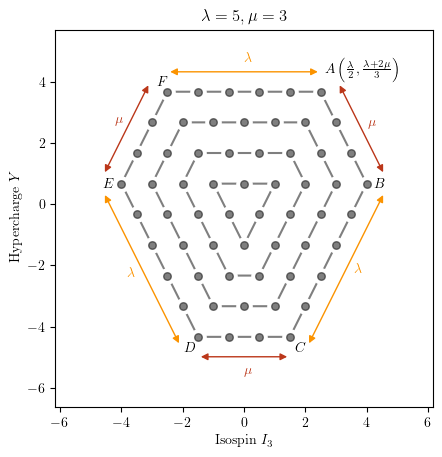

In [4]:
fig, ax = plt.subplots(figsize=(5,5))

lamb = 5
mu   = 3

lamb_c = "#FB9300"
mu_c   = "#BB371A"

pd = 0.65

draw_multiplet(ax, lamb, mu,
               size=30,
               point_color='k', line_color='k', no_frame=False, zero_lines=False)

A = top_point(lamb, mu)
B = A-mu*U
C = B+lamb*V
D = C-mu*I
E = D+lamb*U
F = E-mu*V

# ax.text(*(A+padding), r"$A\left(\frac{\lambda}{2},\frac{\lambda+2\mu}{3}\right)$")

ax.annotate(text=r"$A\left(\frac{\lambda}{2},\frac{\lambda+2\mu}{3}\right)$", xy=A, xytext=A+[.15, .6])
ax.annotate(text=r"$B$", xy=B, xytext=B+[.25,-.15])
ax.annotate(text=r"$C$", xy=C, xytext=C+[.15,-.5])
ax.annotate(text=r"$D$", xy=D, xytext=D+[-.45,-.5])
ax.annotate(text=r"$E$", xy=E, xytext=E+[-.60,-.15])
ax.annotate(text=r"$F$", xy=F, xytext=F+[-.35,.2])

ax.annotate(text='', xy=A+pd*UT, xytext=B+pd*UT, arrowprops=dict(arrowstyle='<|-|>', color=mu_c))
ax.annotate(text='', xy=B+pd*VT, xytext=C+pd*VT, arrowprops=dict(arrowstyle='<|-|>', color=lamb_c))
ax.annotate(text='', xy=C-pd*IT, xytext=D-pd*IT, arrowprops=dict(arrowstyle='<|-|>', color=mu_c))
ax.annotate(text='', xy=D-pd*UT, xytext=E-pd*UT, arrowprops=dict(arrowstyle='<|-|>', color=lamb_c))
ax.annotate(text='', xy=E-pd*VT, xytext=F-pd*VT, arrowprops=dict(arrowstyle='<|-|>', color=mu_c))
ax.annotate(text='', xy=F+pd*IT, xytext=A+pd*IT, arrowprops=dict(arrowstyle='<|-|>', color=lamb_c))

ax.text(*((A+B)/2+1.35*pd*UT), r'$\mu$', color=mu_c)
ax.text(*((B+C)/2+1.45*pd*VT), r'$\lambda$', color=lamb_c)
ax.text(*((C+D)/2-1.85*pd*IT), r'$\mu$', color=mu_c)
ax.text(*((D+E)/2-1.85*pd*UT), r'$\lambda$', color=lamb_c)
ax.text(*((E+F)/2-1.65*pd*VT), r'$\mu$', color=mu_c)
ax.text(*((F+A)/2+1.50*pd*IT), r'$\lambda$', color=lamb_c)

expand_limits(ax, 1.4)
plt.show()

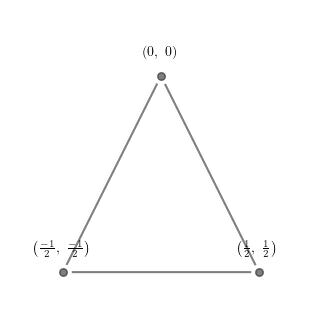

In [93]:
fig1, ax1 = plt.subplots()
draw_multiplet(ax1, 0, 1,
               size=30,
               point_color='k', line_color='k',
               no_frame=True, plot_title=False,
               zero_lines=False, point_labels=True)

expand_limits(ax1, 1.4)
plt.show()

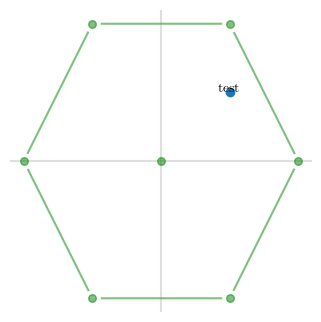

In [40]:
figt, axt = plt.subplots()
draw_multiplet(axt, 1, 1, plot_title=False)

axttext = axt.text(0.5, 0.5, "test", ha='center')
axt.scatter(0.5, 0.5)

plt.show()

In [38]:
print(axttext.

None


In [51]:
print(int(1.0) - 1.0 == 0)

True


In [76]:
str(fractions.Fraction(1/3).limit_denominator(30))

'1/3'

In [73]:
'1'.split('/')

['1']

In [74]:
'2/3'.split('/')

['2', '3']